# Interactive Plotting and Monte Carlo simulations of CPPI

In [35]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import risk_kit as rk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### GBM Interactive Plots

<AxesSubplot:>

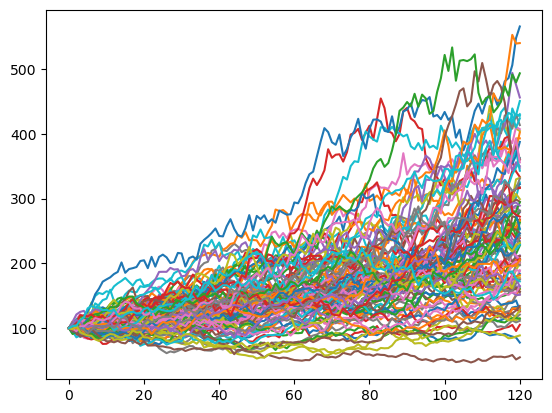

In [36]:
rk.gbm(n_years= 10, n_scenarios= 100, mu=0.1).plot(legend=False)

In [37]:
# Put the plotting routine into a function
def show_gbm(n_scenarios= 1000, mu= 0.07, sigma= 0.15): 
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0=100
    prices= rk.gbm(n_scenarios =n_scenarios, mu= mu, sigma= sigma, s_0= s_0)
    ax= prices.plot(legend= False, color= 'indianred', alpha= 0.5, linewidth= 2, figsize=(12,6))
    ax.axhline(y= s_0, ls= ':', color= 'black')
    ax.set_ylim(top=400)
    #Draw a dot at the origin
    ax.plot(0, s_0, marker= 'o', color= 'darkred', alpha= 0.2)

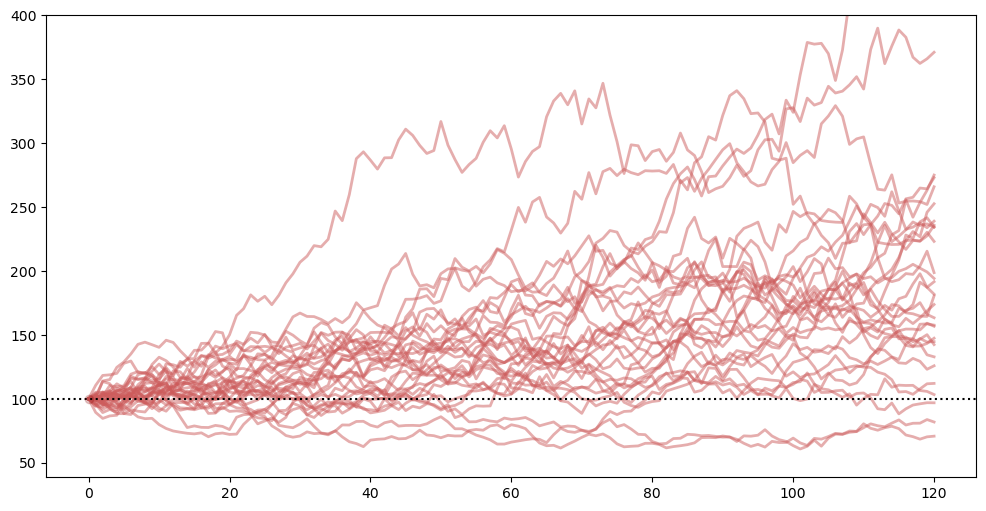

In [38]:
show_gbm(30, 0.07, 0.15)

In [39]:
gbm_controls= widgets.interactive(show_gbm,
                                 n_scenarios= (1, 100, 1),
                                 mu= (-0.2, 0.2, 0.01),
                                 sigma= (0, 0.5, 0.01)
                                 )
display(gbm_controls)

interactive(children=(IntSlider(value=100, description='n_scenarios', min=1), FloatSlider(value=0.07, descript…

### Interactive CPPI Simulation - Monte Carlo

In [40]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0, riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = rk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices= False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = rk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)

cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., 0.02, .01),
                                   sigma=(0, .030, .05),
                                   floor=(0, 2, 0.1),
                                   m=(1, 5, 0.5),
                                   riskfree_rate=(0, 0.05, 0.01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

Let's add a histogram of our data.

In [41]:
import matplotlib.pyplot as plt

In [42]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0, riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = rk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices= False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = rk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    terminal_wealth= wealth.iloc[-1] #The last value of our evolution prices dataframe
    #Plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows= 1, ncols= 2, sharey= True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9)) #share the y axis
    plt.subplots_adjust(wspace= 0.0) #There should be no space between 2 subplots

    wealth.plot(ax= wealth_ax, legend= False, alpha= 0.3, color= 'indianred')
    wealth_ax.axhline(y= start, ls=':', color= 'black')
    wealth_ax.axhline(y= start*floor, ls='--', color= 'red')
    wealth_ax.set_ylim(top= y_max)

    terminal_wealth.plot.hist(ax= hist_ax, bins= 50, ec='w', fc= 'indianred', orientation= 'horizontal')
    hist_ax.axhline(y= start, ls=':', color= 'black')

cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0, 0.2, .01),
                                   sigma=(0, 0.3, .05),
                                   floor=(0, 2, 0.1),
                                   m=(1, 5, 0.5),
                                   riskfree_rate=(0, 0.05, 0.01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [44]:
#Add a feature that shows # of violation
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0, riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = rk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices= False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = rk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    terminal_wealth= wealth.iloc[-1] #The last value of our evolution prices dataframe

    tw_mean= terminal_wealth.mean()
    tw_median= terminal_wealth.median()
    failure_mask= np.less(terminal_wealth, start*floor)
    n_failures= failure_mask.sum()
    p_fail= n_failures/ n_scenarios #Probability of failure
    e_shortfall= np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures>0 else 0.0 #Expected Shortfall, which is an equivalent of CVaR

    #Plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows= 1, ncols= 2, sharey= True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9)) #share the y axis
    plt.subplots_adjust(wspace= 0.0) #There should be no space between 2 subplots

    wealth.plot(ax= wealth_ax, legend= False, alpha= 0.3, color= 'indianred')
    wealth_ax.axhline(y= start, ls=':', color= 'black')
    wealth_ax.axhline(y= start*floor, ls='--', color= 'red')
    wealth_ax.set_ylim(top= y_max)

    terminal_wealth.plot.hist(ax= hist_ax, bins= 50, ec='w', fc= 'indianred', orientation= 'horizontal')
    hist_ax.axhline(y= start, ls=':', color= 'black')
    hist_ax.axhline(y= tw_mean, ls=':', color= 'blue')
    hist_ax.axhline(y= tw_median, ls=':', color= 'purple')
    hist_ax.annotate(f'Mean:${int(tw_mean)}', xy=(0.7,0.9), xycoords='axes fraction', fontsize= 24)
    hist_ax.annotate(f'Median:${int(tw_median)}', xy=(0.7,0.85), xycoords='axes fraction', fontsize= 24)
    if (floor>0.01):
        hist_ax.axhline(y =start*floor, ls='--', color= 'red', linewidth= 3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)



cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0, 0.2, .01),
                                   sigma=(0, 0.5, .05),
                                   floor=(0, 2, 0.1),
                                   m=(1, 5, 0.5),
                                   riskfree_rate=(0, 0.05, 0.01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…